In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


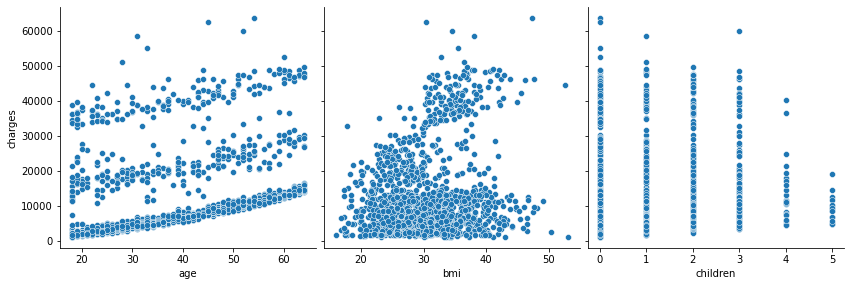

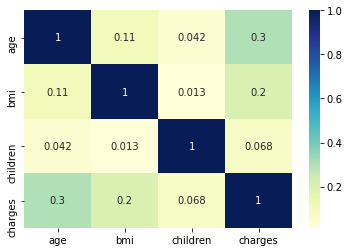

In [3]:
data = pd.read_csv('insurance.csv')
data.info()
sns.pairplot(data, x_vars=['age', 'bmi', 'children'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [4]:
# Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

x = data[['age', 'bmi', 'children']]
y = data['charges']

In [5]:
# Lalu bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
# Dengan proporsi 7:3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


# Lakukan feature scaling.

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Buat model multiple linear regression menggunakan Scikit-Learn.

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)


# Latih model pada data latih dan lakukan prediksi pada data uji.

y_pred = regressor.predict(x_test)

In [6]:
# Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('R-squared: ', r2_score(y_test, y_pred))
print('Mean Squared Error (MSE): ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test, y_pred))

R-squared:  0.1497412806492575
Mean Squared Error (MSE):  135590303.17963448
Mean Absolute Error (MAE):  9147.160154423696


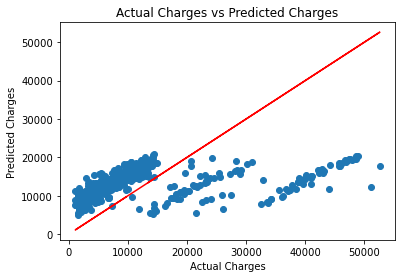

In [7]:
# Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges')
plt.show()